# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [1]:
#Import all the necessary modules

from matplotlib import pyplot as plt
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


In [3]:
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

In [4]:

data = pd.read_csv(r'C:\Users\Ruchira\Desktop\supervised learning\pima-indians-diabetes.csv')

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [5]:
data.head(10)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Q3 Print the datatypes of each column and the shape of the dataset 

In [6]:
data.shape

(768, 9)

There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [7]:
#data=data.mask(data==0).fillna(data.median())
#data.replace(data.median,0, inplace= True)
data.replace(to_replace=0, value = data.median(), inplace = True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Preg     768 non-null int64
Plas     768 non-null int64
Pres     768 non-null int64
skin     768 non-null int64
test     768 non-null float64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(3), int64(6)
memory usage: 54.1 KB


# Q5 Print the descriptive statistics of each & every column using describe() function

In [9]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Preg,768.0,4.278646,3.021516,1.000,2.00000,3.0000,6.00000,17.00
Plas,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
Pres,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
skin,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
test,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
mass,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

In [10]:
import matplotlib.pyplot as plt   
#importing seaborn for statistical plots
import seaborn as sns
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
import os
import matplotlib.pyplot as pl
import matplotlib.pyplot as plt
import seaborn as sns

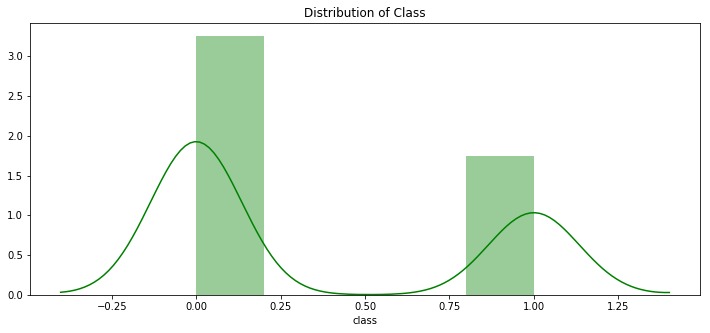

In [11]:
#Distribution of ‘class’ 
pl.figure(figsize=(12,5))
pl.title("Distribution of Class")
ax = sns.distplot(data['class'], color = 'g')

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


In [12]:
data.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.278646,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.021516,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Using the plot - infer the relationship between different variables

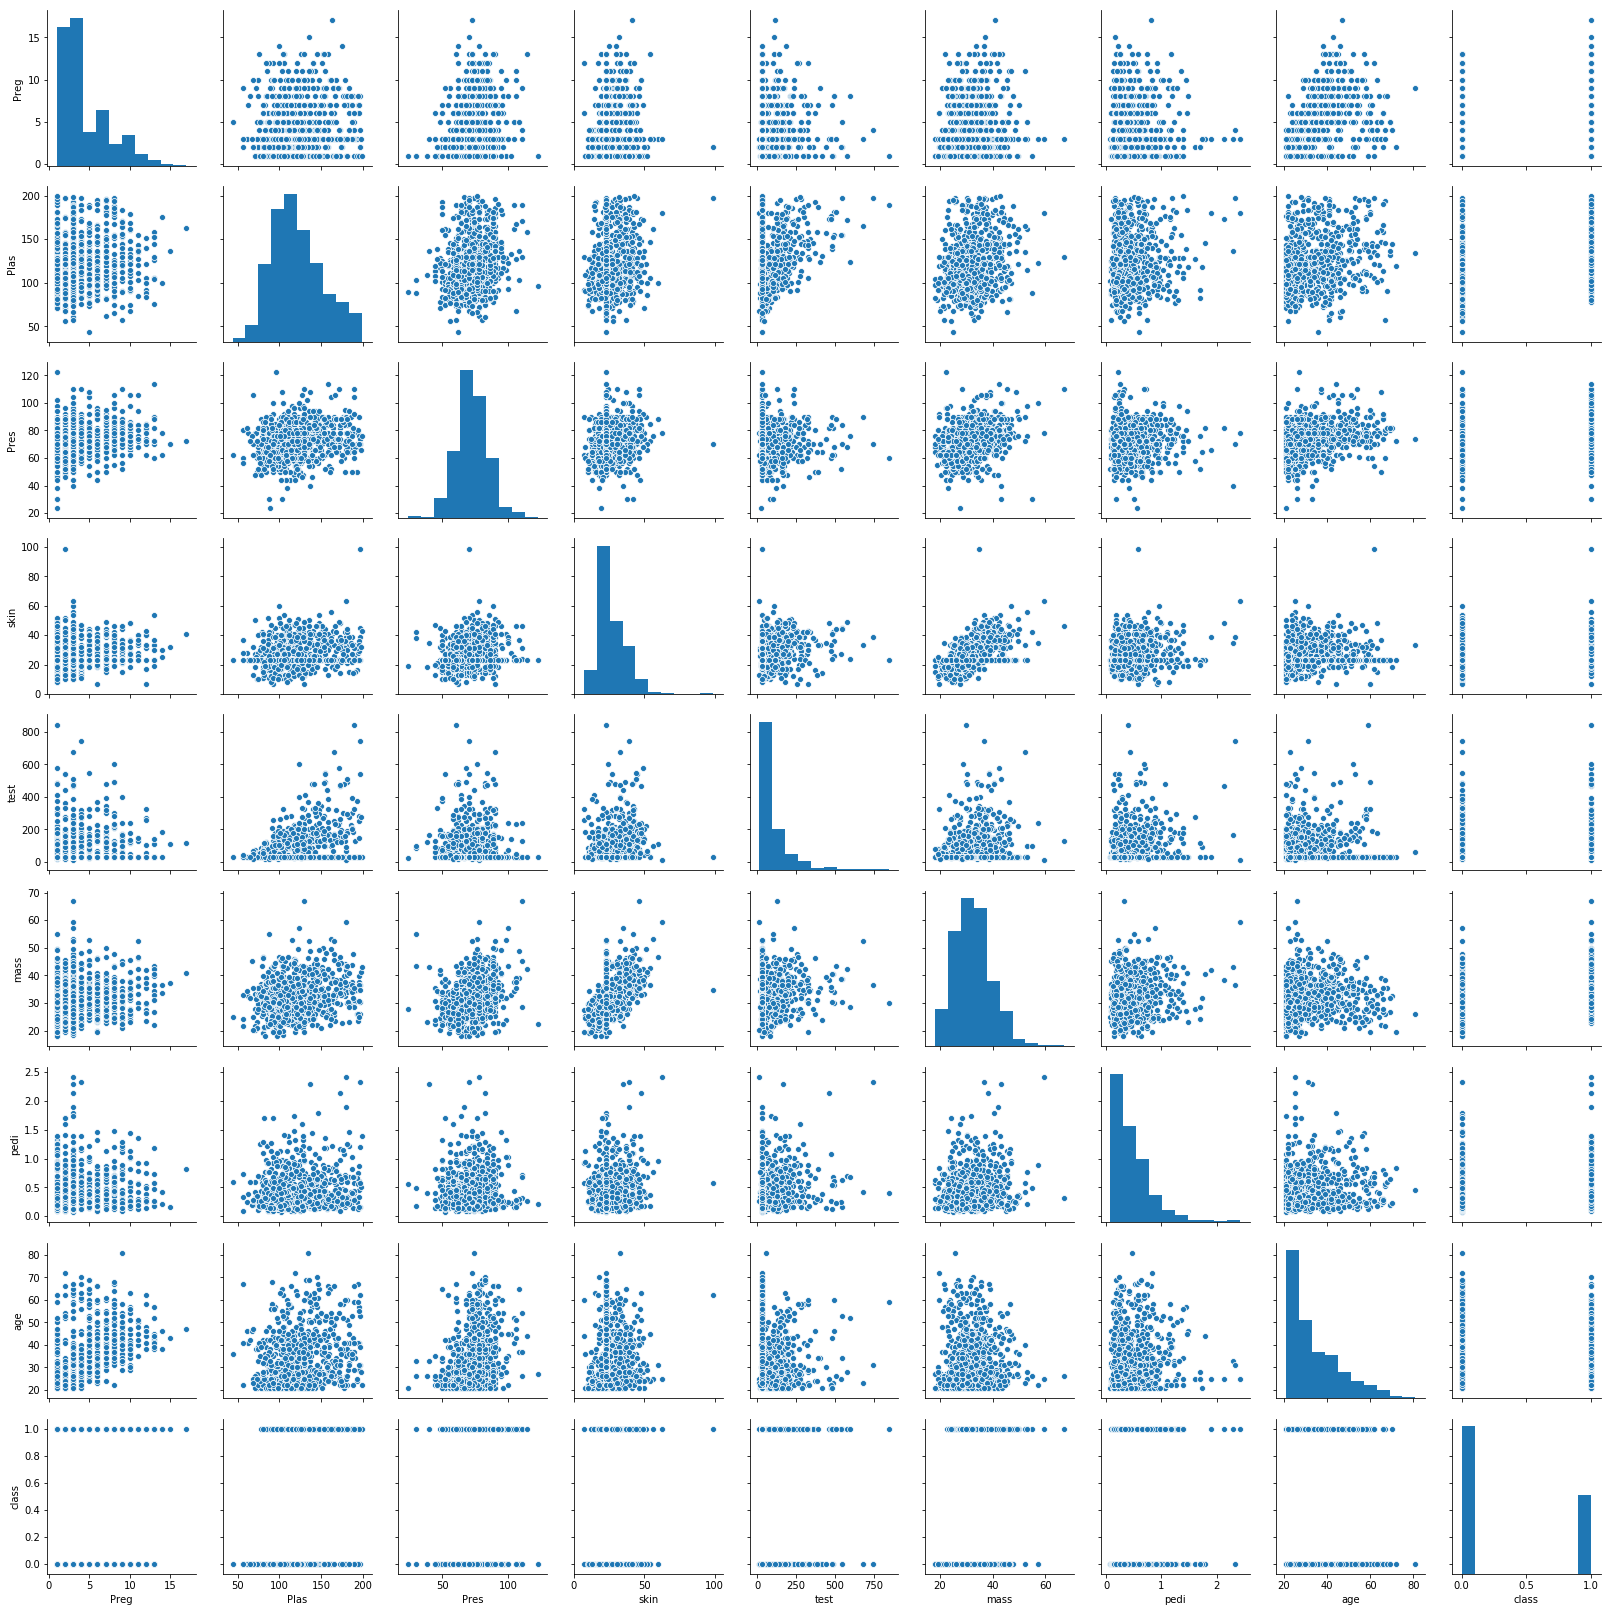

In [13]:
# Pairplot using sns
sns.pairplot(data, diag_kind='auto')

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [14]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X = data.drop(["class"], axis=1)
y = data[["class"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state = 7)


# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [15]:
dt_model =DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, min_samples_leaf=10 )


In [16]:
sfs1= sfs(dt_model, k_features=3, forward=True, scoring='accuracy', cv=5)
sfs1 = sfs1.fit(X_train.values, y_train.values)

In [17]:
sfs1.get_metric_dict()

{1: {'feature_idx': (1,),
  'cv_scores': array([0.7037037 , 0.75      , 0.74074074, 0.77570093, 0.70754717]),
  'avg_score': 0.7355385097670408,
  'feature_names': ('1',),
  'ci_bound': 0.03470851086671235,
  'std_dev': 0.02700440061649297,
  'std_err': 0.013502200308246485},
 2: {'feature_idx': (1, 7),
  'cv_scores': array([0.74074074, 0.75      , 0.68518519, 0.78504673, 0.72641509]),
  'avg_score': 0.7374775498475022,
  'feature_names': ('1', '7'),
  'ci_bound': 0.04179530620273118,
  'std_dev': 0.032518168149645386,
  'std_err': 0.016259084074822693},
 3: {'feature_idx': (1, 4, 7),
  'cv_scores': array([0.74074074, 0.75      , 0.75925926, 0.78504673, 0.74528302]),
  'avg_score': 0.7560659495679773,
  'feature_names': ('1', '4', '7'),
  'ci_bound': 0.020224551197169156,
  'std_dev': 0.0157353879258739,
  'std_err': 0.007867693962936947}}

# Q10 Print the accuracy of the model & print the confusion matrix 

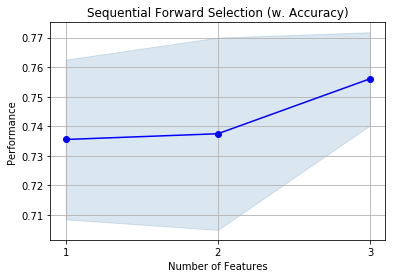

In [18]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig = plot_sfs(sfs1.get_metric_dict())
plt.title('Sequential Forward Selection (w. Accuracy)')
plt.grid()
plt.show()

In [19]:
# Which features?
columnList = list(X_train.columns)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[1, 4, 7]


In [20]:
subsetColumnList = [columnList[i] for i in feat_cols] 
print(subsetColumnList)

['Plas', 'test', 'age']


In [21]:
dt_model.fit(X_train[subsetColumnList], y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [22]:
y_train_pred= dt_model.predict(X_train[subsetColumnList])
print('Training accuracy on selected features: %.3f' % dt_model.score(X_train[subsetColumnList], y_train))

Training accuracy on selected features: 0.795


In [23]:
test_pred = dt_model.predict(X_test[subsetColumnList])
print('Test accuracy on selected features: %.3f' % dt_model.score(X_test[subsetColumnList], y_test))


Test accuracy on selected features: 0.745


In [24]:
dt_model.fit(X_train, y_train)

print('Training accuracy on all features: %.3f' % dt_model.score(X_train , y_train))

Training accuracy on all features: 0.825


In [25]:
test_pred = dt_model.predict(X_test)
print('Test accuracy on all features: %.3f' %dt_model.score(X_test , y_test))

Test accuracy on all features: 0.706


In [26]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,test_pred))

[[104  43]
 [ 25  59]]


Print the feature importance of the decision model - Optional

In [27]:
#importance of decision mode
subsetColumnList = [columnList[i] for i in feat_cols] 
print(subsetColumnList)

['Plas', 'test', 'age']


In [28]:


from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 2, min_samples_leaf=5 )
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [29]:
dt_model.score(X_test , y_test)

0.7359307359307359

In [30]:
dt_model.score(X_train , y_train)

0.776536312849162

In [31]:
import pydot
from IPython.display import Image
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz

In [32]:
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names
    
    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    return(graph)

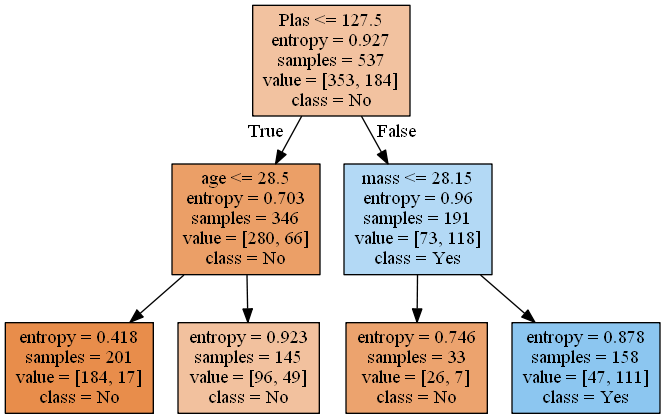

In [34]:
graph2, = print_tree(dt_model, features=X_train.columns, class_names=['No', 'Yes'])
Image(graph2.create_png())